# Data Analysis of NCOV-19 Cases in Indonesia

Personal report of the daily NCOV-19 case, licensed in [Creative Commons CC0 v1.0](https://creativecommons.org/publicdomain/zero/1.0/legalcode.txt), free to use but I'm not responsible for damage from its use.

Worldwide COVID-19 dataset is taken from [datahub.io](https://datahub.io/core/covid-19). Here are samples of it:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style("whitegrid")

dataset = pd.read_csv(
    "https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv",
)
dataset

,Date,Country,Confirmed,Deaths
0,2020-01-22,Afghanistan,0,0
1,2020-01-22,Albania,0,0
2,2020-01-22,Algeria,0,0
3,2020-01-22,Andorra,0,0
4,2020-01-22,Angola,0,0
...,...,...,...,...
11370,2020-03-26,Venezuela,107,0
11371,2020-03-26,Vietnam,153,0
11372,2020-03-26,West Bank and Gaza,84,1
11373,2020-03-26,Zambia,16,0


## Indonesia

Indonesia COVID-19 dataset is derived from the worldwide one.
Data before 2020-03-01 is truncated because there's no cases before that date.

In [2]:
dataset_id = dataset[(dataset["Country"] == "Indonesia") & (dataset["Date"] >= "2020-03-01")]
dataset_id = dataset_id.drop(columns=["Country"])
dataset_id.tail()

,Date,Confirmed,Deaths
10576,2020-03-22,514,48
10751,2020-03-23,579,49
10926,2020-03-24,686,55
11101,2020-03-25,790,58
11276,2020-03-26,893,78


Difference of each days can be seen in this table:

In [3]:
diff_columns = dataset_id.columns.difference(['Date'])
dataset_id_diff = dataset_id.copy()
dataset_id_diff[diff_columns] = dataset_id_diff[diff_columns].diff()
dataset_id_diff.tail()

,Date,Confirmed,Deaths
10576,2020-03-22,64.0,10.0
10751,2020-03-23,65.0,1.0
10926,2020-03-24,107.0,6.0
11101,2020-03-25,104.0,3.0
11276,2020-03-26,103.0,20.0


### Confirmed Cases

#### Actual

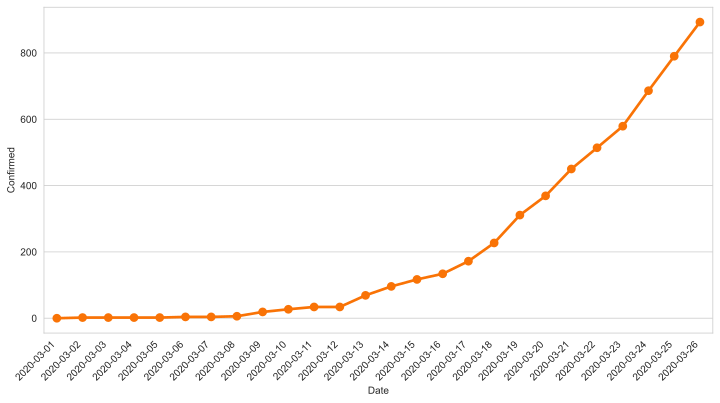

In [4]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Confirmed",
    data=dataset_id,
    color=sns.xkcd_rgb["orange"]
)
_ = plt.xticks(rotation=45, horizontalalignment="right")

#### Rise

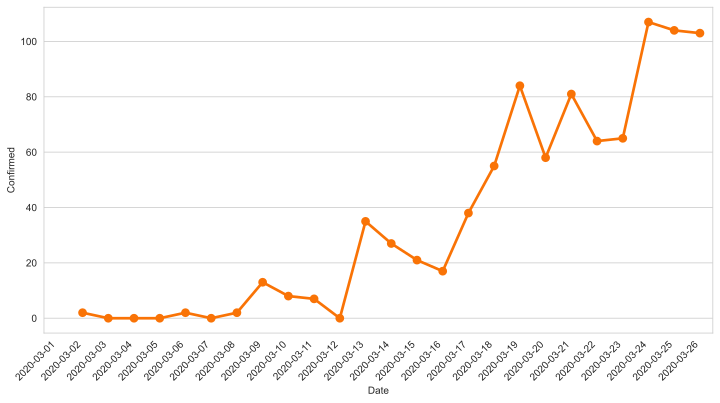

In [5]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Confirmed",
    data=dataset_id_diff,
    color=sns.xkcd_rgb["orange"]
)
_ = plt.xticks(rotation=45, horizontalalignment="right")

### Deaths

#### Actual

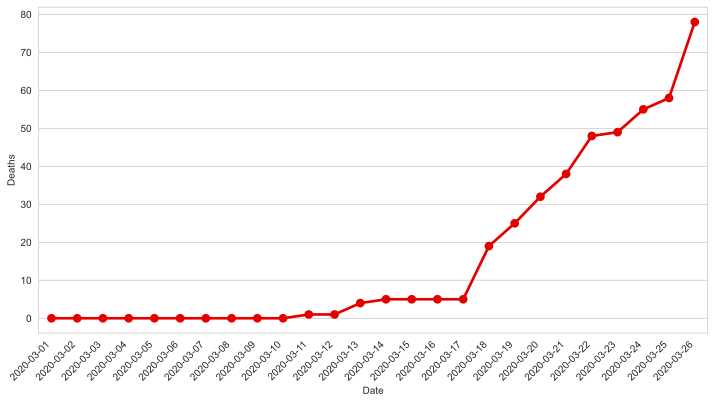

In [6]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Deaths",
    data=dataset_id,
    color=sns.xkcd_rgb["red"]
)
_ = plt.xticks(rotation=45, horizontalalignment="right")

#### Rise

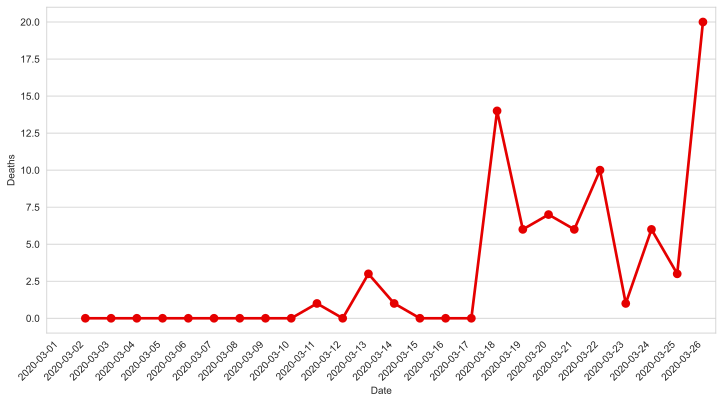

In [7]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Deaths",
    data=dataset_id_diff,
    color=sns.xkcd_rgb["red"]
)
_ = plt.xticks(rotation=45, horizontalalignment="right")

## China

China COVID-19 dataset is derived from the worldwide one.

In [12]:
dataset_cn = dataset[dataset["Country"] == "China"]
dataset_cn = dataset_cn.drop(columns=["Country"])
dataset_cn.tail()

,Date,Confirmed,Deaths
10533,2020-03-22,81435,3274
10708,2020-03-23,81498,3274
10883,2020-03-24,81591,3281
11058,2020-03-25,81661,3285
11233,2020-03-26,81782,3291


Difference of each days can be seen in this table:

In [13]:
diff_columns = dataset_cn.columns.difference(['Date'])
dataset_cn_diff = dataset_cn.copy()
dataset_cn_diff[diff_columns] = dataset_cn_diff[diff_columns].diff()
dataset_cn_diff.tail()

,Date,Confirmed,Deaths
10533,2020-03-22,130.0,15.0
10708,2020-03-23,63.0,0.0
10883,2020-03-24,93.0,7.0
11058,2020-03-25,70.0,4.0
11233,2020-03-26,121.0,6.0


### Confirmed Cases

#### Actual

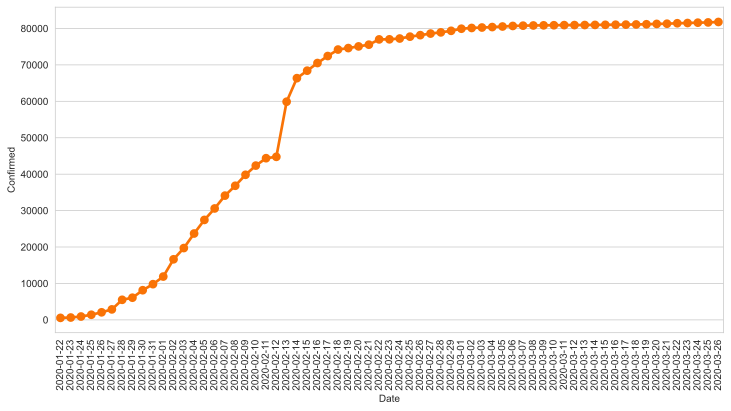

In [17]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Confirmed",
    data=dataset_cn,
    color=sns.xkcd_rgb["orange"]
)
_ = plt.xticks(rotation=90)

#### Rise

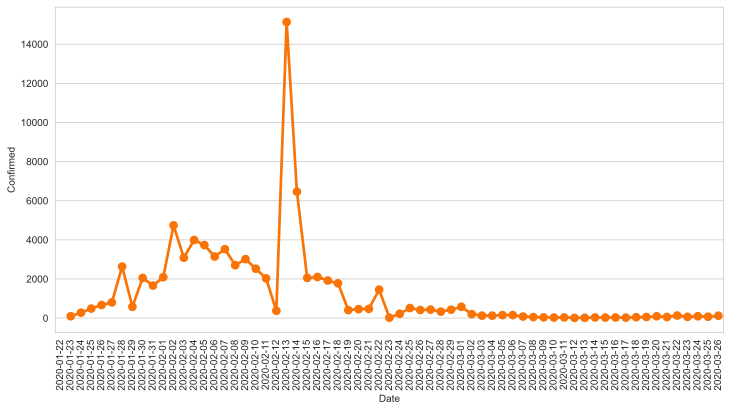

In [20]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Confirmed",
    data=dataset_cn_diff,
    color=sns.xkcd_rgb["orange"]
)
_ = plt.xticks(rotation=90)

## Italy

Italy COVID-19 dataset is derived from the worldwide one. Data before 2020-02-01 is truncated because there's less cases before that date.

In [25]:
dataset_it = dataset[(dataset["Country"] == "Italy") & (dataset["Date"] >= "2020-02-01")]
dataset_it = dataset_it.drop(columns=["Country"])
dataset_it.tail()

,Date,Confirmed,Deaths
10581,2020-03-22,59138,5476
10756,2020-03-23,63927,6077
10931,2020-03-24,69176,6820
11106,2020-03-25,74386,7503
11281,2020-03-26,80589,8215


Difference of each days can be seen in this table:

In [26]:
diff_columns = dataset_it.columns.difference(['Date'])
dataset_it_diff = dataset_it.copy()
dataset_it_diff[diff_columns] = dataset_it_diff[diff_columns].diff()
dataset_it_diff.tail()

,Date,Confirmed,Deaths
10581,2020-03-22,5560.0,651.0
10756,2020-03-23,4789.0,601.0
10931,2020-03-24,5249.0,743.0
11106,2020-03-25,5210.0,683.0
11281,2020-03-26,6203.0,712.0


### Confirmed Cases

#### Actual

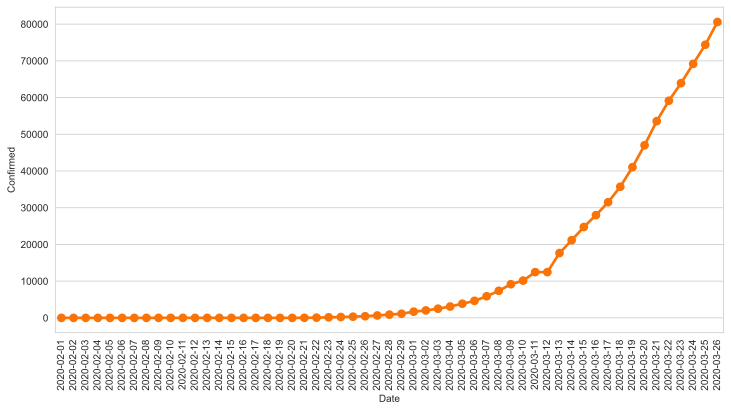

In [27]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Confirmed",
    data=dataset_it,
    color=sns.xkcd_rgb["orange"]
)
_ = plt.xticks(rotation=90)

#### Rise

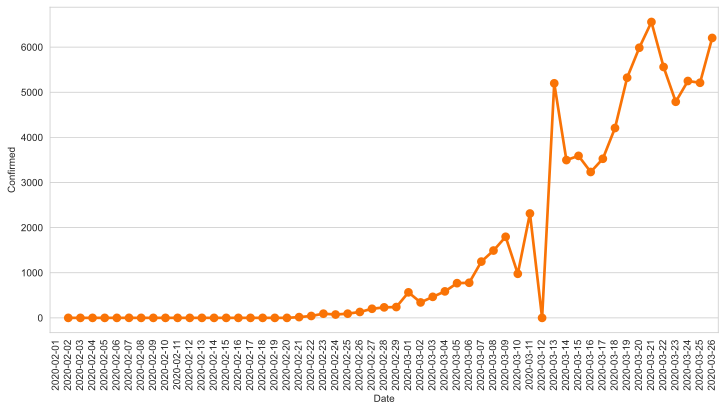

In [28]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Confirmed",
    data=dataset_it_diff,
    color=sns.xkcd_rgb["orange"]
)
_ = plt.xticks(rotation=90)